# Formation Institut des Algorithmes du Sénégal : test final


# Logistic Regression Project - Solutions

Dans ce projet, vous travaillerez avec des données publicitaires, indiquant si un internaute particulier a cliqué ou non sur une publicité sur le site Web d'une entreprise. Vous essaierez de créer un modèle qui prédira s'il cliquera ou non sur une annonce en fonction des caractéristiques de cet utilisateur.

Ci-dessous la description des variables que contient le jeu de données:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Initialisation

**- Importez toutes les libraries dont vous jugez nécessaires**

In [1]:
## Importez les libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Chargement des données
- Chargez les données contenues dans le répertoire dataset/advertising.csv

In [2]:
## Load data
df =pd.read_csv("dataset/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


- Faite l'exploration et le néttoyage des données
    - Afficher le nombre de lignes/colonnes
    - Afficher les 100 dernières valeurs du dataframe
    - Visualisez des graphiques/diagrammes en barre...

In [3]:
#nombre de ligne
df.shape[0]

1000

In [4]:
#nombre de colonne
df.shape[1]

10

In [5]:
#Afficher les 100 dernières valeurs du dataframe
df.tail(100)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
900,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,2016-02-11 17:02:07,1
901,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,2016-07-22 07:44:43,1
902,45.62,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,2016-06-26 02:34:15,1
903,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,2016-05-14 23:08:14,0
904,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,2016-05-24 10:04:39,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [6]:
df.isnull().any()# verication des valeurs manquante, ce qui montre le df n'a pas de valeur maquante

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [73]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
df = df.drop(['Ad Topic Line', 'City', 'Timestamp','Country'], axis=1)#supression des colonne ayant NAN
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
#Visualisez des graphiques/diagrammes en barre..

Text(0, 0.5, '')

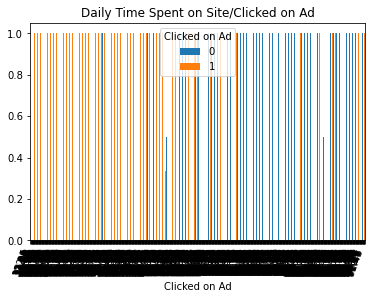

In [71]:
table=pd.crosstab(df['Daily Time Spent on Site'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Daily Time Spent on Site/Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.xticks(rotation=70, ha='right')
plt.ylabel('')

Text(0, 0.5, '')

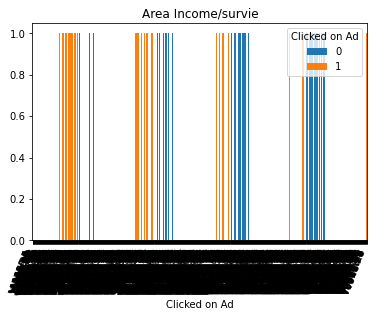

In [70]:
table=pd.crosstab(df['Area Income'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Area Income/Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.xticks(rotation=70, ha='right')
plt.ylabel('')

Text(0, 0.5, '')

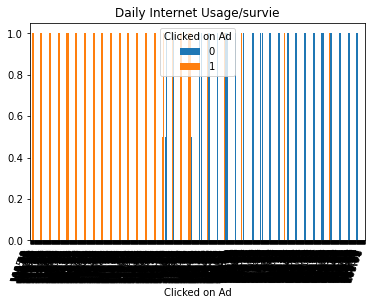

In [54]:
table=pd.crosstab(df['Daily Internet Usage'],df['Clicked on Ad'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Daily Internet Usage/Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.xticks(rotation=70, ha='right')
plt.ylabel('')

Text(0, 0.5, '')

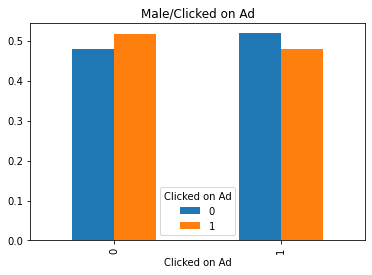

In [57]:
table=pd.crosstab(df.Male,df['Clicked on Ad'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Male/Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('')

In [11]:
print ('\nFeatures : \n', df.columns.tolist()) #mettres les colonne du dataframe dans une liste



Features : 
 ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']


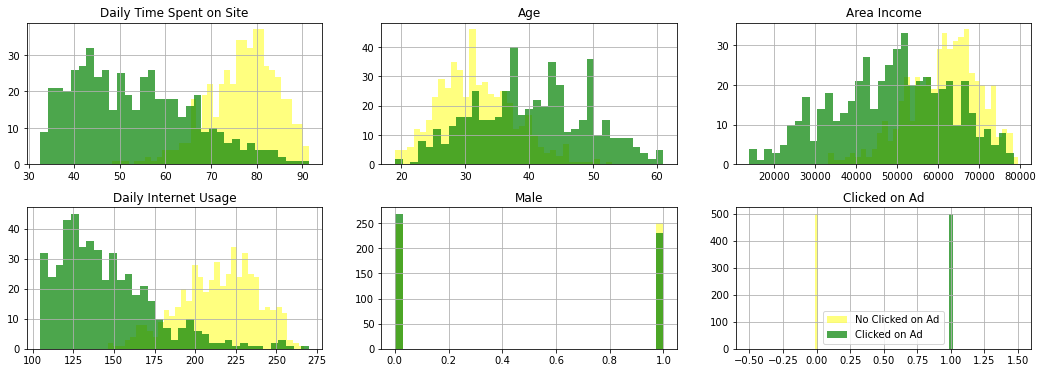

In [72]:
features =  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
ROWS, COLS = 2, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,6) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    df[df["Clicked on Ad"]==0][feature].hist(bins=35, color='yellow', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df["Clicked on Ad"]==1][feature].hist(bins=35, color='green', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Clicked on Ad', 'Clicked on Ad'])
fig.subplots_adjust(hspace=0.3)


In [21]:
df = df.drop(['Ad Topic Line', 'City', 'Timestamp','Country'], axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [21]:
ad_data = df.select_dtypes(include=["int64","float64"])
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


# Logistic Regression
Il est temps maintenant d'entrainer votre modèle de régression logistique


- Split the data into training set and testing set using train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X =ad_data.drop(['Clicked on Ad'],axis=1) ### Complétez
y = ad_data['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Train and fit a logistic regression model on the training set

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)## Complétez

LogisticRegression()

## évaluation de la prédiction

- Utilisez la fonction predict() pour prédire sur le jeu de données X_test

In [27]:
predictions = logmodel.predict(X_test)## Complétez

- Créer une matrice de report de la classification

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Conclure : 
- Commentez les résultats de ce tableau. Ce modèle de régression logistique est-il bon pour prédire la variable cible ? Pourqou ?

-Ce resultat de régression logistique est bon d'autant plus l'accuracy est de 91% 